In [1]:
SYSTEM = 'Al-Ni'
PHASE = 'FCC_L12'

In [2]:
import datetime
import time
import os
current_time = datetime.datetime.now()
print(current_time)
timestamp = str(time.mktime(current_time.timetuple()))
os.makedirs('output-results/{0}/{1}/'.format(PHASE, timestamp))

2015-11-30 13:06:49.076778


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
from pycalphad.fitting import build_pymc_model, plot_results
from pycalphad import Database
import pymc
import numpy as np

In [4]:
import glob
input_database = Database(SYSTEM+'-start.tdb')
dataset_names = sorted(glob.glob('input-json/'+PHASE+'/*.json'))

FCCALNI0A = pymc.Normal('FCCALNI0A', mu=0, tau=1./100000**2)
FCCALNI0B = pymc.Normal('FCCALNI0B', mu=0, tau=1./100**2)
FCCALNI1A = pymc.Normal('FCCALNI1A', mu=0, tau=1./100000**2)
FCCALNI1B = pymc.Normal('FCCALNI1B', mu=0, tau=1./100**2)
FCCALNI2A = pymc.Normal('FCCALNI2A', mu=0, tau=1./100000**2)
FCCALNI2B = pymc.Normal('FCCALNI2B', mu=0, tau=1./100**2)
FCCALNI3A = pymc.Normal('FCCALNI3A', mu=0, tau=1./100000**2)
FCCALNI3B = pymc.Normal('FCCALNI3B', mu=0, tau=1./100**2)
FCCBMAGNNI = pymc.Gamma('FCCBMAGNNI', alpha=1, beta=1)
FCCTCALNI0 = pymc.Normal('FCCTCALNI0', mu=0, tau=1./2000**2)
FCCTCALNI1 = pymc.Normal('FCCTCALNI1', mu=0, tau=1./2000**2)
L12UALNI_A = pymc.Normal('L12UALNI_A', mu=0, tau=1./100000**2)
L12UALNI_B = pymc.Normal('L12UALNI_B', mu=0, tau=1./100**2)
params = [FCCALNI0A, FCCALNI0B, FCCALNI1A, FCCALNI1B,
          FCCALNI2A, FCCALNI2B, FCCALNI3A, FCCALNI3B,
          FCCBMAGNNI, FCCTCALNI0, FCCTCALNI1, L12UALNI_A, L12UALNI_B]
%time mod, datasets = build_pymc_model(input_database, dataset_names, params)
MDL = pymc.MCMC(mod, db='hdf5', dbname='output-traces/'+SYSTEM+'-'+PHASE+'-'+timestamp+'.hdf5',
                dbcomplevel=4, dbcomplib='bzip2')

CPU times: user 2min 18s, sys: 324 ms, total: 2min 18s
Wall time: 2min 18s


In [5]:
%time MDL.sample(iter=20000, burn=15000, burn_till_tuned=False, thin=2, progress_bar=True)

 [-----------------100%-----------------] 20001 of 20000 complete in 2141.6 secCPU times: user 35min 43s, sys: 566 ms, total: 35min 43s
Wall time: 35min 41s


Plotting FCCALNI0B
Plotting FCCBMAGNNI
Plotting FCCALNI2B
Plotting FCCALNI0A
Plotting L12UALNI_A
Plotting FCCALNI1B
Plotting L12UALNI_B
Plotting FCCALNI1A
Plotting FCCALNI3B
Plotting FCCALNI2A
Plotting FCCTCALNI0
Plotting FCCALNI3A
Plotting FCCTCALNI1


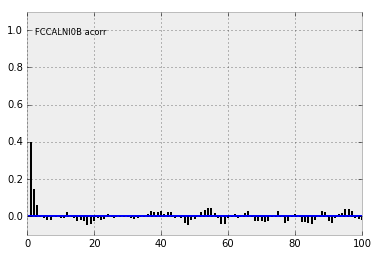

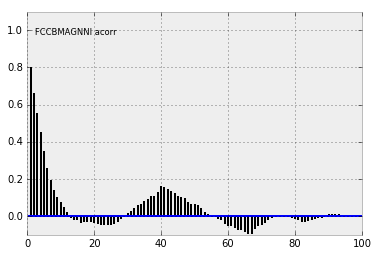

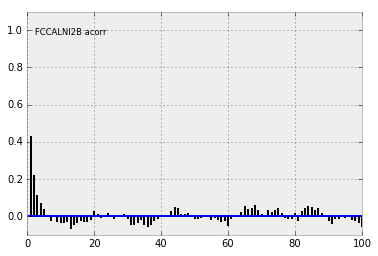

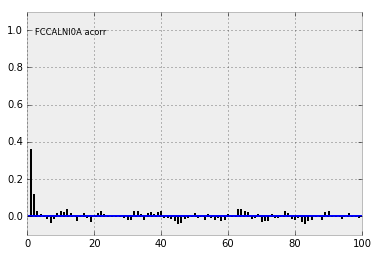

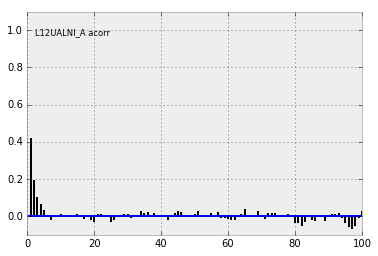

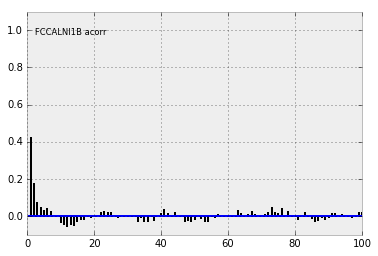

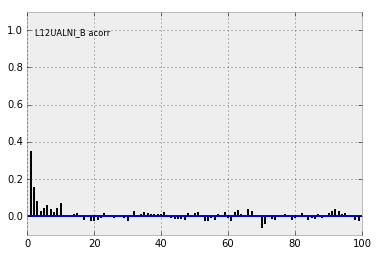

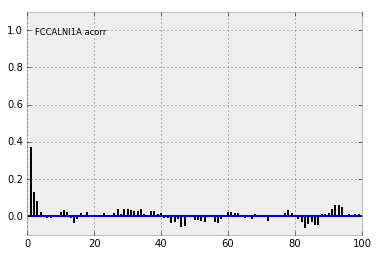

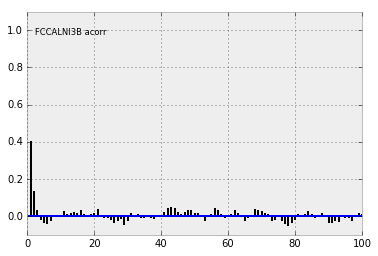

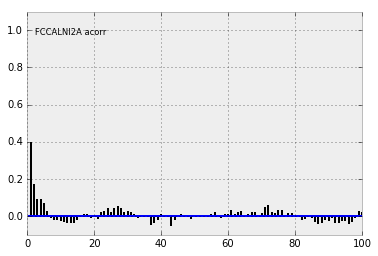

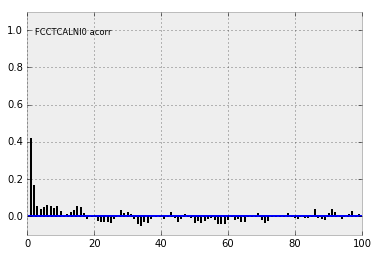

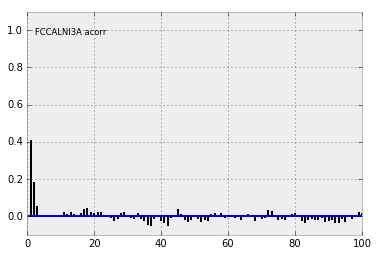

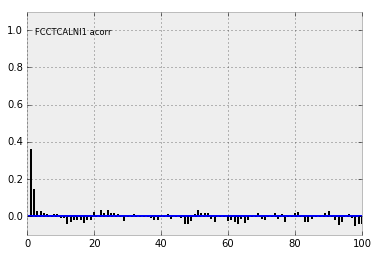

In [6]:
pymc.Matplot.autocorrelation(MDL, format='eps', path='output-results/{0}/{1}/'.format(PHASE, timestamp))

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


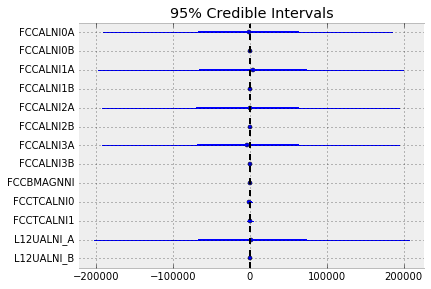

In [7]:
pymc.Matplot.summary_plot(params, format='eps', name=SYSTEM+'-'+PHASE+'-parameters',
                          path='output-results/{0}/{1}/'.format(PHASE, timestamp))

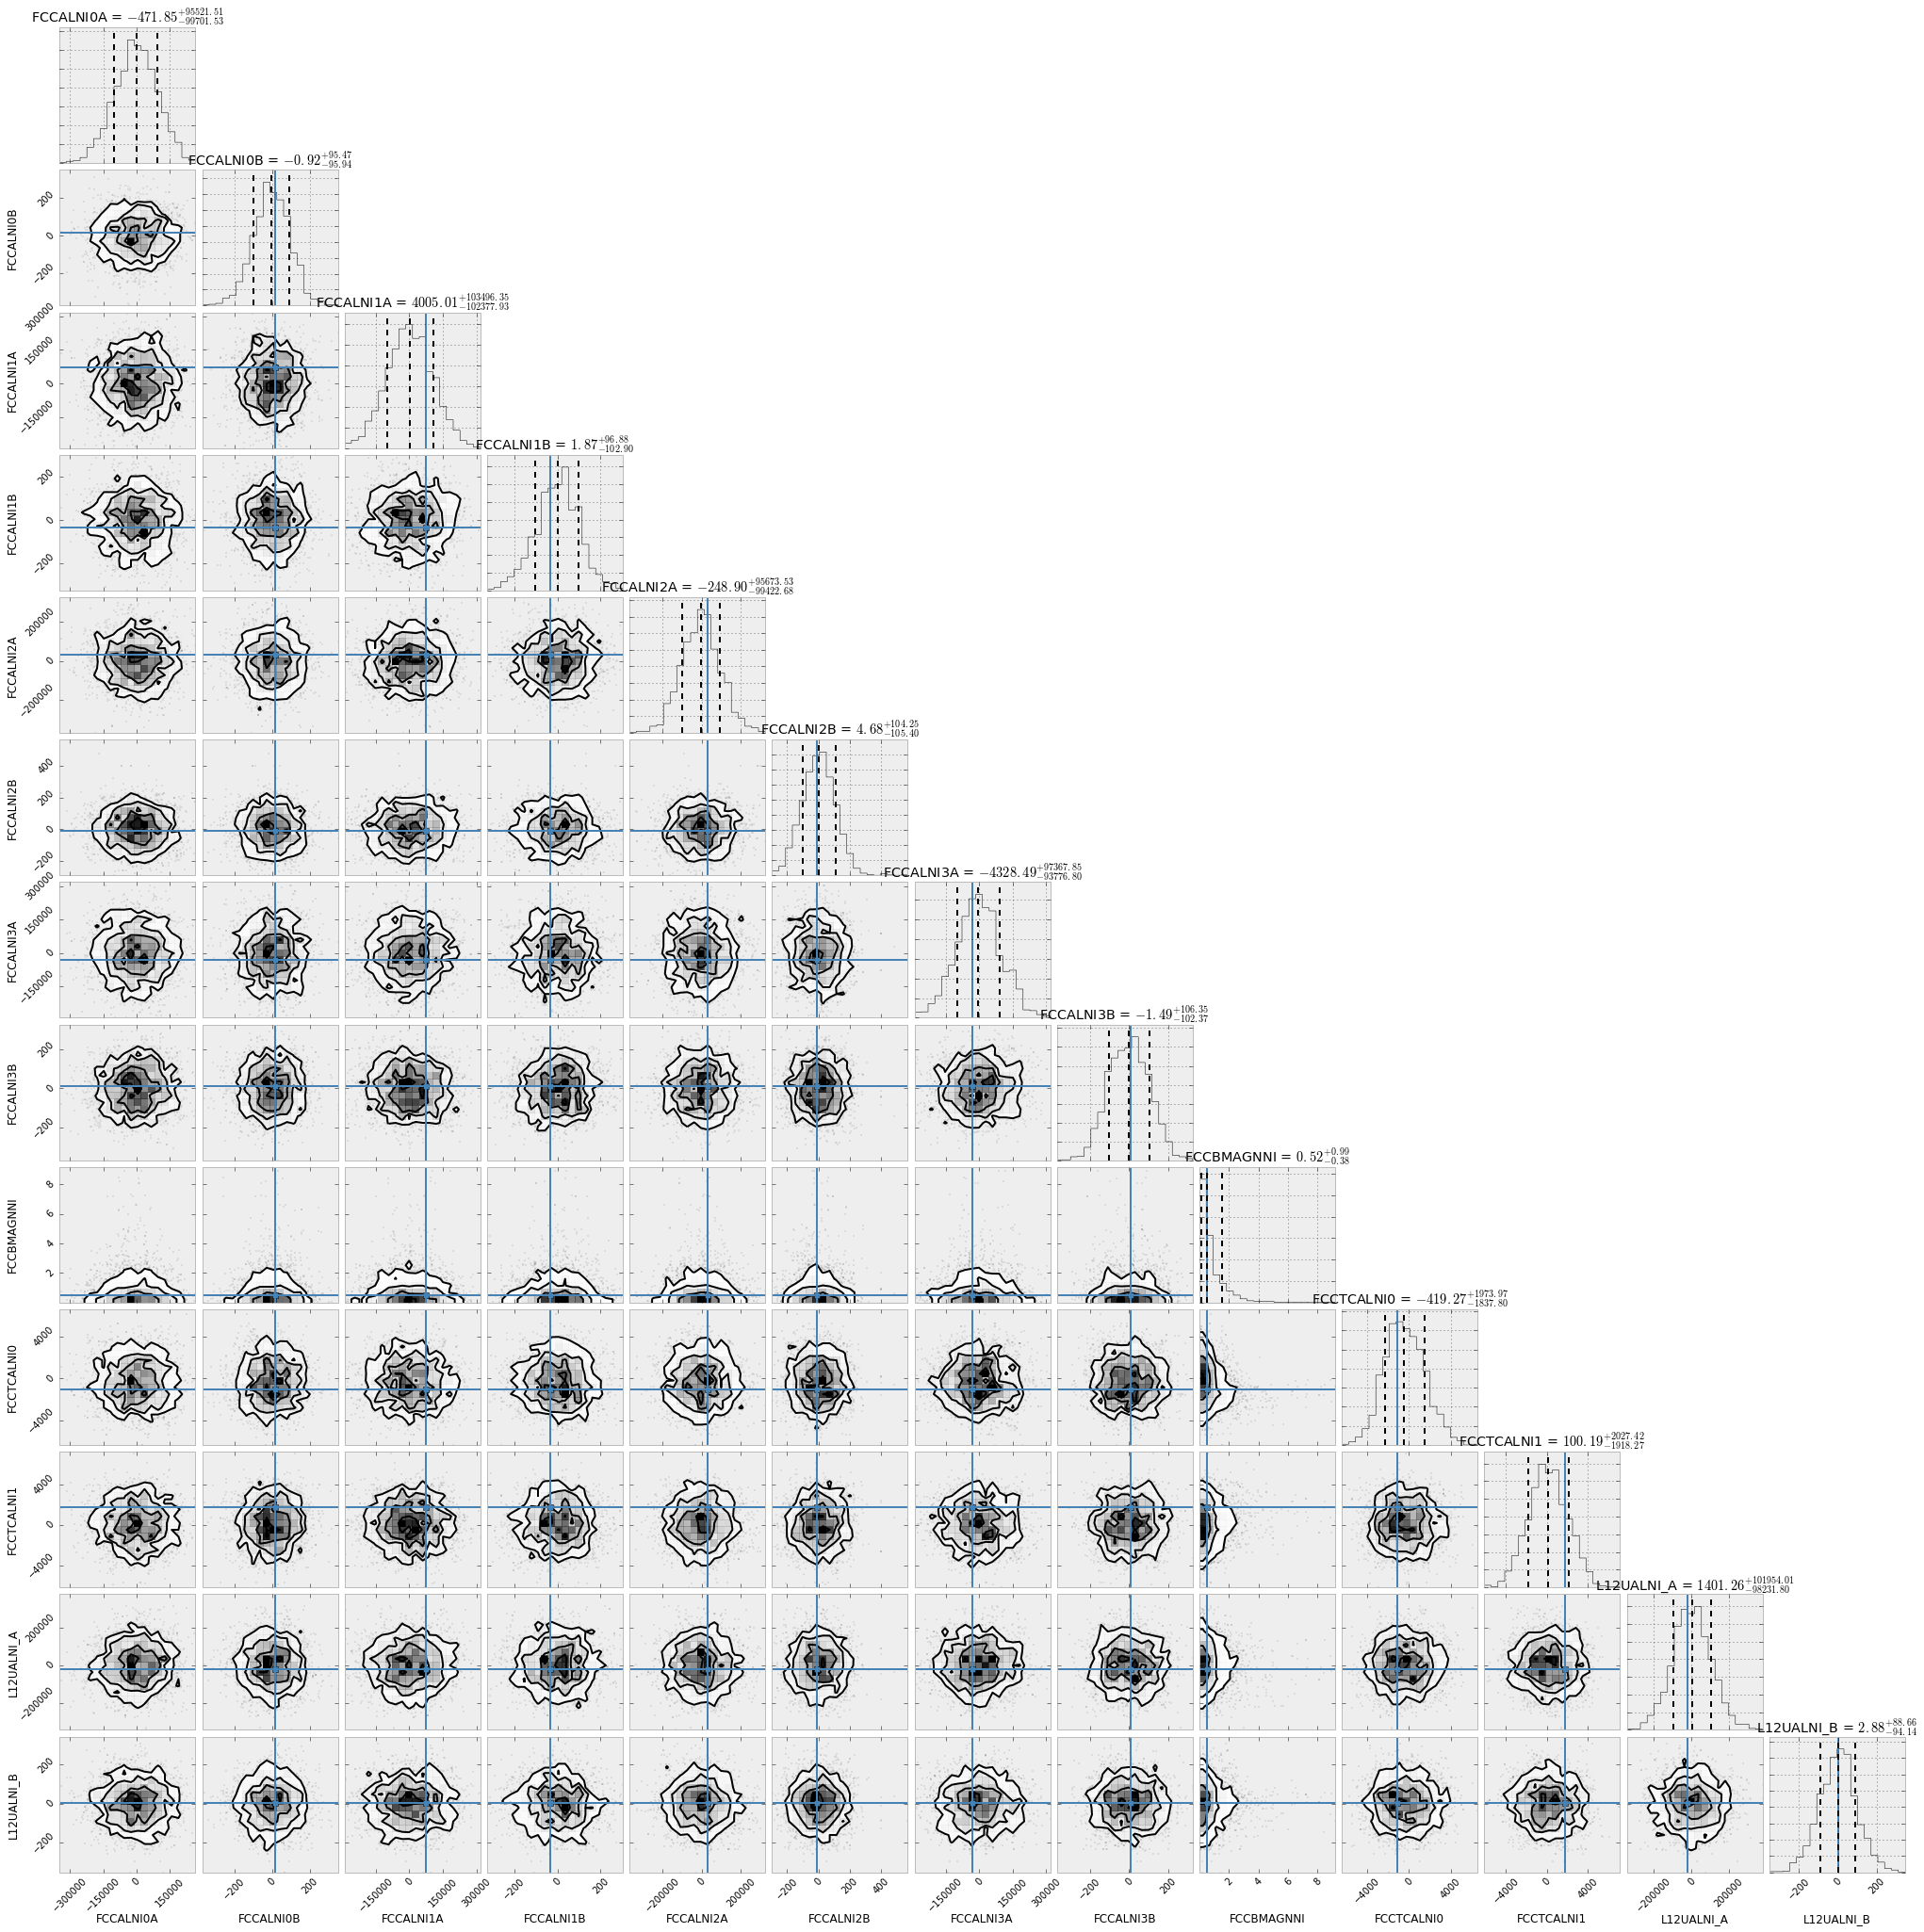

In [13]:
from corner import corner
from itertools import chain
data = np.vstack(chain([i.trace() for i in params])).T
figure = corner(data, labels=[str(i) for i in params],
                quantiles=[0.16, 0.5, 0.84],
                truths=[-1622407.75, 16.212965, 73417.798, -34.914168, 33471.014, -9.8373558,
                        -30758.01, 10.25267, 0.52, -1112, 1745, -22212.8931, 4.39570389],
                show_titles=True, title_args={"fontsize": 40}, rasterized=True)
figure.savefig('output-results/{0}/{1}/{0}-{2}-corner.pdf'.format(PHASE, timestamp, SYSTEM))
figure.show()

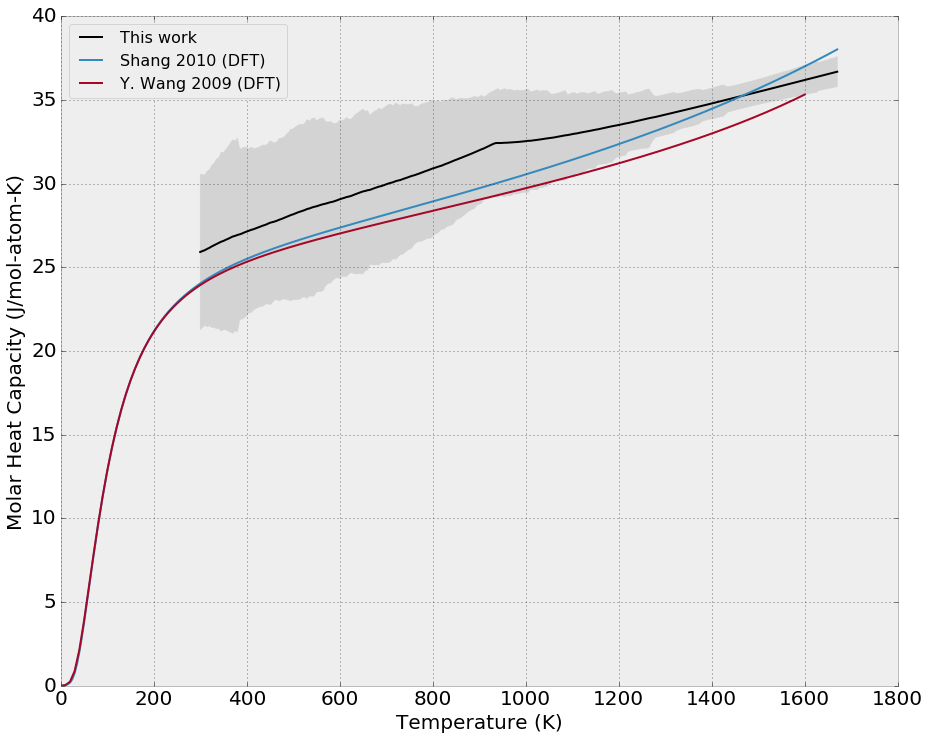

In [9]:
%matplotlib inline
from pycalphad.fitting import plot_results
figures = list(plot_results(datasets, params))
figures[0].savefig('output-results/{0}/{1}/{0}-{2}-heatcapacity.eps'.format(PHASE, timestamp, SYSTEM))

In [10]:
MDL.write_csv('output-results/{0}/{1}/{0}-{2}-param-summary.csv'.format(PHASE, timestamp, SYSTEM))
MDL.summary()


FCCALNI0B:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.855           97.515           2.575        [-184.838  189.297]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-194.336         -63.806         -0.887         65.165        183.852
	

FCCBMAGNNI:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.845            1.041            0.059[  2.00000000e-03   2.63000000e+00]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.024            0.217           0.52           1.053         3.527
	

FCCALNI2B:
 
	Mean             SD               MC Error        95% HPD interval